In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# multiple linear regression model
predictors = [
    'carat',
    'x'
]

Y = df['price']
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X)
results = model.fit()

In [5]:
X

,const,carat,x
0,1.0,0.23,3.95
1,1.0,0.21,3.89
2,1.0,0.23,4.05
3,1.0,0.29,4.20
4,1.0,0.31,4.34
...,...,...,...
53936,1.0,0.72,5.75
53937,1.0,0.72,5.69
53938,1.0,0.70,5.66
53939,1.0,0.86,6.15


In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.570e+05
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        12:15:16   Log-Likelihood:            -4.7199e+05
No. Observations:               53941   AIC:                         9.440e+05
Df Residuals:                   53938   BIC:                         9.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1737.7139    103.622     16.770      0.0

In [7]:
df.loc[20107]

carat       1.5
cut        Good
color         I
clarity     SI1
depth      64.0
table      60.0
price      8580
x          7.13
y          7.25
z           4.6
Name: 20107, dtype: object

In [8]:
carat = 1.5
x = 7.13
m1 = results.params['carat']
m2 = results.params['x']
b = results.params['const']
price = m1*carat + m2*x + b

In [9]:
print(price)

9605.36613408892


In [10]:
# multiple linear regression model
predictors = [
    'carat',
    'x',
    'y',
    'z'
]

Y = df['price']
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X)
results = model.fit()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        12:19:12   Log-Likelihood:            -4.7188e+05
No. Observations:               53941   AIC:                         9.438e+05
Df Residuals:                   53936   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1921.0000    104.372     18.405      0.0

In [12]:
carat = 1.5
x = 7.13
y = 7.25
z = 4.6
m1 = results.params['carat']
m2 = results.params['x']
m3 = results.params['y']
m4 = results.params['z']
b = results.params['const']

price = m1*carat + m2*x + m3*y + m4*z + b

In [13]:
print(price)

9520.783644767513


In [14]:
print(pd.unique(df['color'].sort_values()))

['D' 'E' 'F' 'G' 'H' 'I' 'J']


/tmp/ipykernel_91/3636776757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='color', y='price', order=color_order, palette='YlOrBr')


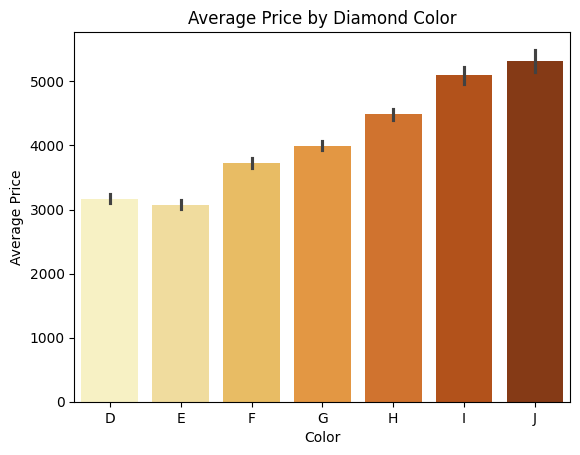

In [17]:
# Set the order of colors from D to J
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

# create the barplot
sns.barplot(df, x='color', y='price', order=color_order, palette='YlOrBr')

# Customize plot
plt.title('Average Price by Diamond Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

In [21]:
predictors = [
    'carat',
    'color'
]

Y = df['price']
X = sm.add_constant(pd.get_dummies(df[predictors], columns=['color'], drop_first=True, dtype=int))

In [22]:
X.head()

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
0,1.0,0.23,1,0,0,0,0,0
1,1.0,0.21,1,0,0,0,0,0
2,1.0,0.23,1,0,0,0,0,0
3,1.0,0.29,0,0,0,0,1,0
4,1.0,0.31,0,0,0,0,0,1


In [23]:
model = sm.OLS(Y, X)
results = model.fit()

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        13:30:38   Log-Likelihood:            -4.6998e+05
No. Observations:               53941   AIC:                         9.400e+05
Df Residuals:                   53933   BIC:                         9.401e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.2196     20.122   -106.163      0.0

In [25]:
X_train = X[1000:]
X_test = X[:1000]

In [26]:
Y_train = Y[1000:]
Y_test = Y[:1000]

In [30]:
print(len(Y_test), len(Y_test))
print(len(Y_train), len(Y_train))

1000 1000
52941 52941


In [31]:
model = sm.OLS(Y_train, X_train)
results = model.fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.805e+04
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        13:37:35   Log-Likelihood:            -4.6119e+05
No. Observations:               52941   AIC:                         9.224e+05
Df Residuals:                   52933   BIC:                         9.225e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.8108     20.269   -105.421      0.0

In [33]:
diamond1 = X_test.loc[0]

In [34]:
diamond1

const      1.00
carat      0.23
color_E    1.00
color_F    0.00
color_G    0.00
color_H    0.00
color_I    0.00
color_J    0.00
Name: 0, dtype: float64

In [35]:
results.predict(diamond1)

None   -376.053034
dtype: float64

In [36]:
Y_test.loc[0]

np.int64(326)

In [37]:
Y_test

0        326
1        326
2        327
3        334
4        335
       ...  
995     8820
996    10685
997     9581
998     1279
999     1270
Name: price, Length: 1000, dtype: int64

In [38]:
predicted = results.predict(X_test)

In [39]:
type(predicted)

pandas.core.series.Series

In [40]:
predicted.sample(10)

376    9068.570227
822     269.152117
179     366.550323
812    1236.959844
956     363.359158
813    -449.559976
23     1089.214953
370    1075.658556
595    5359.937951
878    7060.553765
dtype: float64

In [41]:
predicted.describe()

count     1000.000000
mean      4176.332288
std       3903.570993
min      -1631.432129
25%        995.007912
50%       3431.274790
75%       6189.103560
max      26571.057289
dtype: float64

In [49]:
# use residuals to understand fit
y_pred = results.predict(X_test)
y_pred.head()

0    -376.053034
1    -537.354322
2    -376.053034
3    -852.813195
4   -1550.781485
dtype: float64

In [53]:
y_actual = Y_test
y_actual.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

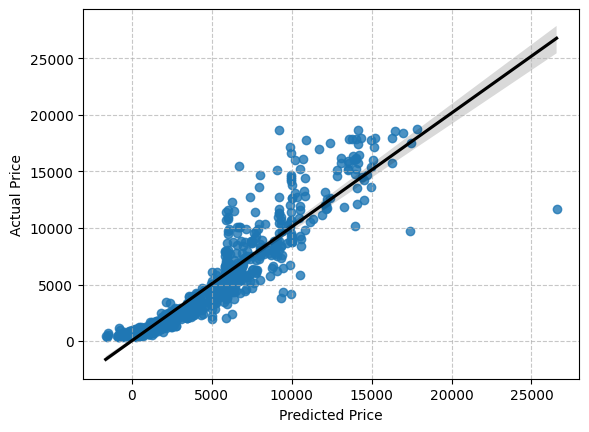

In [54]:
sns.regplot(x=y_pred, y=y_actual, line_kws={'color':'black'})
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(alpha=0.7, linestyle='--')
plt.show()

In [55]:
# multiple r
print(type(y_pred))
print(type(y_actual))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [56]:
y_pred.corr(y_actual)

np.float64(0.927762918142623)

In [57]:
residuals = y_actual - y_pred
residuals.head()

0     702.053034
1     863.354322
2     703.053034
3    1186.813195
4    1885.781485
dtype: float64

In [58]:
MAE = residuals.abs().mean()
print(MAE)

992.612838294212
